In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [5]:
df=pd.read_csv("https://media-doselect.s3.amazonaws.com/generic/OzvzVqK4pgg4x7qEadoZMRyVR/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.shape

(1338, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


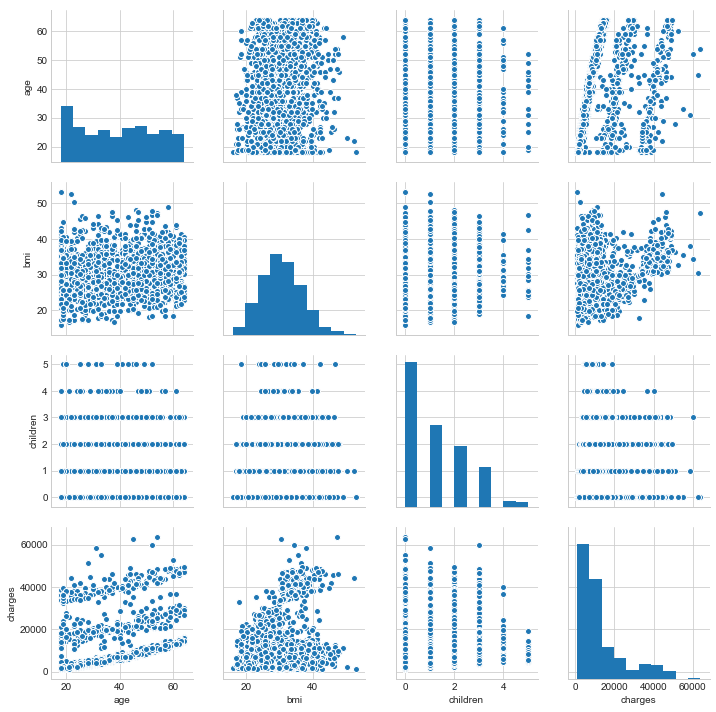

In [9]:
sns.pairplot(df)
plt.show()

In [27]:
df1 = pd.DataFrame({'BMI_group':[]})
df1.head()

,BMI_group


In [29]:
df = pd.concat([df,df1],axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,BMI_group,BMI_group,BMI_group
0,19,female,27.9,0,yes,southwest,16884.9,Underweight,Underweight,NaN
1,18,male,33.77,1,no,southeast,1725.55,Normal,Normal,NaN
2,28,male,33,3,no,southeast,4449.46,Overweight,Overweight,NaN
3,33,male,22.705,0,no,northwest,21984.5,Obese,Obese,NaN
4,32,male,28.88,0,no,northwest,3866.86,NaN,NaN,NaN


In [40]:
import pandas as pd 
pd.set_option('display.max_columns', 500)
df=pd.read_csv("https://media-doselect.s3.amazonaws.com/generic/OzvzVqK4pgg4x7qEadoZMRyVR/insurance.csv")
def bmi_group(val):
    if val<18.5:
        return "Underweight"
    if (val>=18.5) & (val<24.9):
        return "Normal"
    if (val>=24.9) & (val<=29.9):
        return "Overweight"
    if val>=30:
        return "Obese"
    
df["BMI_group"] = df.bmi.apply(bmi_group)
print(df.head())



   age     sex     bmi  children smoker     region      charges   BMI_group
0   19  female  27.900         0    yes  southwest  16884.92400  Overweight
1   18    male  33.770         1     no  southeast   1725.55230       Obese
2   28    male  33.000         3     no  southeast   4449.46200       Obese
3   33    male  22.705         0     no  northwest  21984.47061      Normal
4   32    male  28.880         0     no  northwest   3866.85520  Overweight


In [41]:
df.head()

,age,sex,bmi,children,smoker,region,charges,BMI_group
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Normal
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age          1338 non-null int64
sex          1338 non-null object
bmi          1338 non-null float64
children     1338 non-null int64
smoker       1338 non-null object
region       1338 non-null object
charges      1338 non-null float64
BMI_group    1329 non-null object
dtypes: float64(2), int64(2), object(4)
memory usage: 83.7+ KB


In [43]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [44]:
df.head()

,age,sex,bmi,children,smoker,region,charges,BMI_group
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Normal
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


In [45]:
varlist =['smoker']
df[varlist] = df[varlist].apply(lambda X: X.map({'yes':1,'no':0})) # subsetting /converting categorical into numeric
df[varlist]

,smoker
0,1
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [46]:
df.head()

,age,sex,bmi,children,smoker,region,charges,BMI_group
0,19,female,27.900,0,1,southwest,16884.92400,Overweight
1,18,male,33.770,1,0,southeast,1725.55230,Obese
2,28,male,33.000,3,0,southeast,4449.46200,Obese
3,33,male,22.705,0,0,northwest,21984.47061,Normal
4,32,male,28.880,0,0,northwest,3866.85520,Overweight


In [54]:
status = pd.get_dummies(df['region'])
status.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [55]:
status1 = pd.get_dummies(df['sex'])
status1.head()

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [56]:
status2 = pd.get_dummies(df['BMI_group'])
status2.head()

,Normal,Obese,Overweight,Underweight
0,0,0,1,0
1,0,1,0,0
2,0,1,0,0
3,1,0,0,0
4,0,0,1,0


In [57]:
df = pd.concat([df,status,status1,status2],axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,BMI_group,Normal,Obese,Overweight,Underweight,northeast,northwest,southeast,southwest,female,male,Normal,Obese,Overweight,Underweight
0,19,female,27.900,0,1,southwest,16884.92400,Overweight,0,0,1,0,0,0,0,1,1,0,0,0,1,0
1,18,male,33.770,1,0,southeast,1725.55230,Obese,0,1,0,0,0,0,1,0,0,1,0,1,0,0
2,28,male,33.000,3,0,southeast,4449.46200,Obese,0,1,0,0,0,0,1,0,0,1,0,1,0,0
3,33,male,22.705,0,0,northwest,21984.47061,Normal,1,0,0,0,0,1,0,0,0,1,1,0,0,0
4,32,male,28.880,0,0,northwest,3866.85520,Overweight,0,0,1,0,0,1,0,0,0,1,0,0,1,0


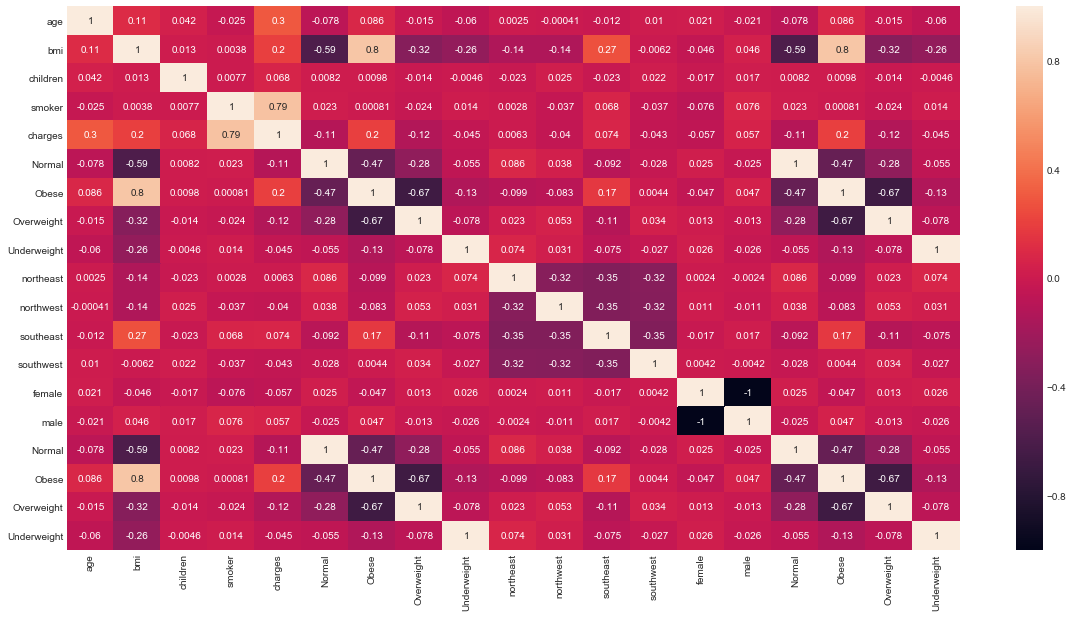

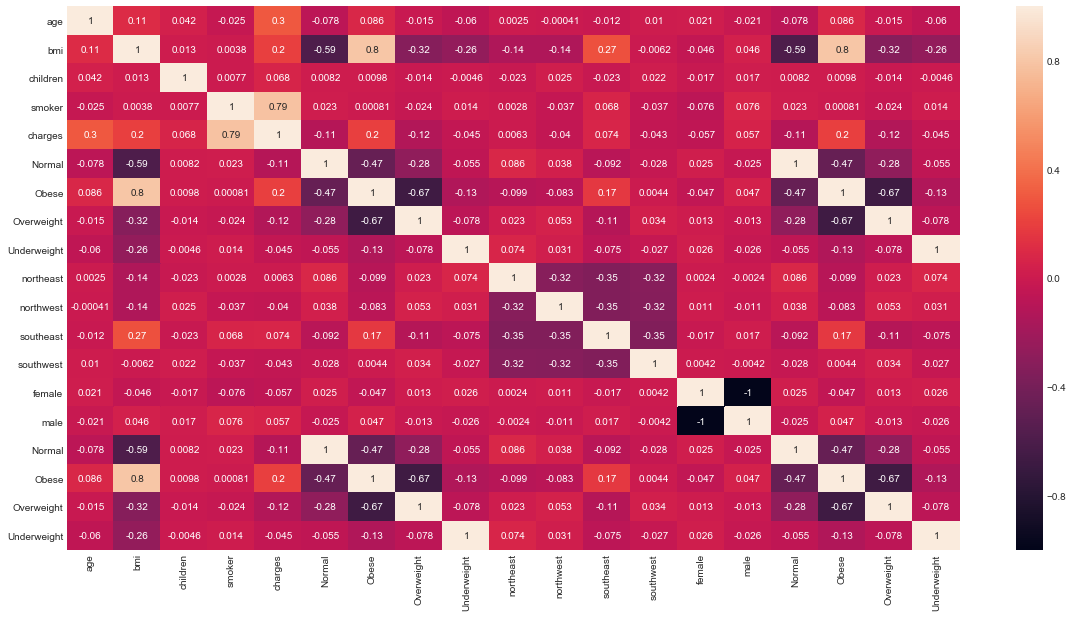

In [59]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

In [65]:
print("Correlation Matrix")
print(df.corr())
print()

Correlation Matrix
                  age       bmi  children    smoker   charges    Normal  \
age          1.000000  0.109272  0.042469 -0.025019  0.299008 -0.078098   
bmi          0.109272  1.000000  0.012759  0.003750  0.198341 -0.591119   
children     0.042469  0.012759  1.000000  0.007673  0.067998  0.008216   
smoker      -0.025019  0.003750  0.007673  1.000000  0.787251  0.022593   
charges      0.299008  0.198341  0.067998  0.787251  1.000000 -0.106512   
Normal      -0.078098 -0.591119  0.008216  0.022593 -0.106512  1.000000   
Obese        0.085668  0.799211  0.009807  0.000810  0.199532 -0.472106   
Overweight  -0.014948 -0.324046 -0.013848 -0.023894 -0.117768 -0.280901   
Underweight -0.060142 -0.264664 -0.004592  0.013803 -0.044960 -0.054942   
northeast    0.002475 -0.138156 -0.022808  0.002811  0.006349  0.085552   
northwest   -0.000407 -0.135996  0.024806 -0.036945 -0.039905  0.037836   
southeast   -0.011642  0.270025 -0.023066  0.068498  0.073982 -0.092073   
southw

In [73]:
print(round(df.smoker.corr(df.bmi),4))
print(round(df.smoker.corr(df.age),4))
print(round(df.smoker.corr(df.charges),4))

0.0038
-0.025
0.7873


In [75]:
le = LabelEncoder()
#sex
le.fit(df.sex.drop_duplicates()) 
df.sex = le.transform(df.sex)
# smoker or not
le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)
#region
le.fit(df.region.drop_duplicates()) 
df.region = le.transform(df.region)
#changing data type
df.BMI_group=df.BMI_group.astype(str)
le.fit(df.BMI_group.drop_duplicates()) 
df.BMI_group = le.transform(df.BMI_group)
print(df.head())

NameError: name 'LabelEncoder' is not defined

In [77]:
df_train,df_test = train_test_split(df, train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(936, 22)
(402, 22)


In [79]:
scaler = MinMaxScaler()
num_vars =['smoker','charges']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,age,sex,bmi,children,smoker,region,charges,BMI_group,Normal,Obese,Overweight,Underweight,northeast,northwest,southeast,southwest,female,male,Normal,Obese,Overweight,Underweight
966,51,male,24.795,2,1.0,northwest,0.364661,Normal,1,0,0,0,0,1,0,0,0,1,1,0,0,0
522,51,female,33.915,0,0.0,northeast,0.139579,Obese,0,1,0,0,1,0,0,0,1,0,0,1,0,0
155,44,male,39.520,0,0.0,northwest,0.093008,Obese,0,1,0,0,0,1,0,0,0,1,0,1,0,0
671,29,female,31.160,0,0.0,northeast,0.045040,Obese,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1173,38,male,29.260,2,0.0,northwest,0.085173,Overweight,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [80]:
df_train[num_vars].describe()

,smoker,charges
count,936.000000,936.000000
mean,0.194444,0.192301
std,0.395984,0.193690
min,0.000000,0.000000
25%,0.000000,0.055033
50%,0.000000,0.129662
75%,0.000000,0.245247
max,1.000000,1.000000


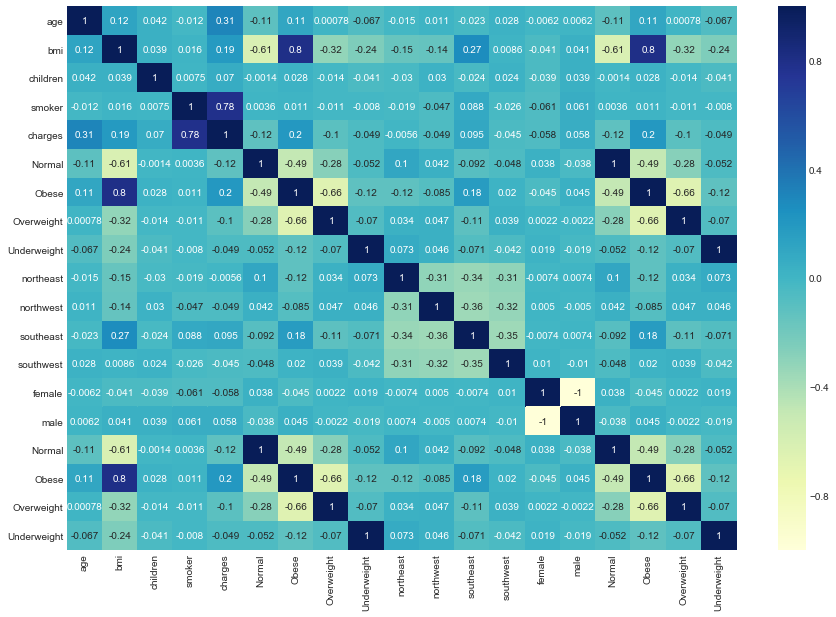

In [85]:
plt.figure(figsize=(15,10))
sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

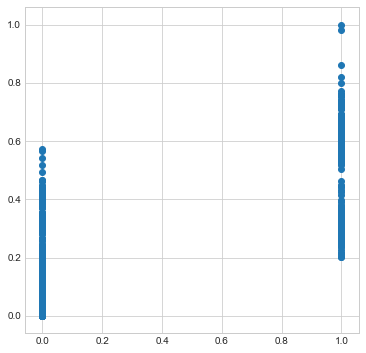

In [86]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.smoker, df_train.charges)
plt.show()

In [87]:
y_train = df_train.pop('charges')
X_train = df_train

In [89]:
X_train_lm = sm.add_constant(X_train[['smoker']])

In [90]:
lr = sm.OLS(y_train, X_train_lm).fit()

In [91]:
lr.params

const     0.117977
smoker    0.382235
dtype: float64

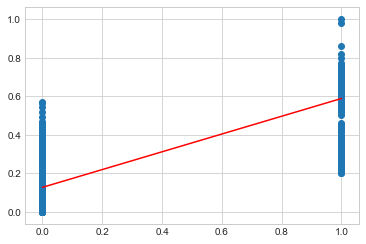

In [92]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.127 + 0.462*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [93]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     1465.
Date:                Mon, 08 Jul 2019   Prob (F-statistic):          1.60e-193
Time:                        16:11:13   Log-Likelihood:                 650.28
No. Observations:                 936   AIC:                            -1297.
Df Residuals:                     934   BIC:                            -1287.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1180      0.004     26.791      0.0

In [96]:
# Adding another variables

X_train_lm = X_train[['age', 'smoker','bmi']]

In [97]:
#Building the linear regression model

X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    -0.183280
age       0.004170
smoker    0.382986
bmi       0.004486
dtype: float64

In [98]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     856.0
Date:                Mon, 08 Jul 2019   Prob (F-statistic):          3.43e-267
Time:                        16:19:32   Log-Likelihood:                 828.06
No. Observations:                 936   AIC:                            -1648.
Df Residuals:                     932   BIC:                            -1629.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1833      0.018    -10.120      0.0